In [9]:
# importing essential python libraries:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

In [10]:
# reading data from csv files:
aqi = pd.read_csv(r"C:\Users\Shivam\Downloads\aqi.csv" )
vehicle = pd.read_csv(r"C:\Users\Shivam\Downloads\vahan.csv")
disease = pd.read_csv(r"C:\Users\Shivam\Downloads\idsp.csv", encoding='unicode_escape')
popln = pd.read_csv(r"C:\Users\Shivam\Downloads\population_projection.csv")

a) Cleaning aqi data

In [11]:
aqi.head()

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
3,30-04-2025,Chhattisgarh,Tumidih,1,PM10,103,Moderate,number_of_monitoring_stations in Absolute Numb...,NaN
4,30-04-2025,Assam,Byrnihat,1,PM2.5,61,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


In [12]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date                           235785 non-null  object 
 1   state                          235785 non-null  object 
 2   area                           235785 non-null  object 
 3   number_of_monitoring_stations  235785 non-null  int64  
 4   prominent_pollutants           235785 non-null  object 
 5   aqi_value                      235785 non-null  int64  
 6   air_quality_status             235785 non-null  object 
 7   unit                           235785 non-null  object 
 8   note                           0 non-null       float64
dtypes: float64(1), int64(2), object(6)
memory usage: 16.2+ MB


In [13]:
# fixing the date column type
aqi['date'] = pd.to_datetime(aqi['date'])

C:\Users\Shivam\AppData\Local\Temp\ipykernel_4016\2775291180.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  aqi['date'] = pd.to_datetime(aqi['date'])


In [14]:
# adding year and month columns
aqi['Month'] = aqi['date'].dt.month_name()
aqi['Year'] = aqi['date'].dt.year

In [15]:
# dropping unnecessary columns
aqi.drop(['unit', 'note'], axis=1, inplace=True)

In [16]:
aqi.head()

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,Month,Year
0,2025-04-30,Maharashtra,Amravati,2,PM10,78,Satisfactory,April,2025
1,2025-04-30,Bihar,Purnia,1,CO,56,Satisfactory,April,2025
2,2025-04-30,Madhya Pradesh,Katni,1,O3,98,Satisfactory,April,2025
3,2025-04-30,Chhattisgarh,Tumidih,1,PM10,103,Moderate,April,2025
4,2025-04-30,Assam,Byrnihat,1,PM2.5,61,Satisfactory,April,2025


In [17]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   date                           235785 non-null  datetime64[ns]
 1   state                          235785 non-null  object        
 2   area                           235785 non-null  object        
 3   number_of_monitoring_stations  235785 non-null  int64         
 4   prominent_pollutants           235785 non-null  object        
 5   aqi_value                      235785 non-null  int64         
 6   air_quality_status             235785 non-null  object        
 7   Month                          235785 non-null  object        
 8   Year                           235785 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 16.2+ MB


In [18]:
# checking for duplicates records
aqi.duplicated().sum()

0

In [19]:
# getting uniques values:
aqi.state.unique()

array(['Maharashtra', 'Bihar', 'Madhya Pradesh', 'Chhattisgarh', 'Assam',
       'Manipur', 'Kerala', 'West Bengal', 'Odisha', 'Karnataka',
       'Gujarat', 'Uttarakhand', 'Tamil Nadu', 'Andhra Pradesh',
       'Rajasthan', 'Uttar Pradesh', 'Punjab', 'Mizoram', 'Chandigarh',
       'Telangana', 'Puducherry', 'Meghalaya', 'Himachal Pradesh',
       'Jharkhand', 'Haryana', 'Arunachal Pradesh', 'Nagaland', 'Tripura',
       'Delhi', 'Andaman and Nicobar Islands', 'Sikkim',
       'Jammu and Kashmir'], dtype=object)

In [20]:
aqi.prominent_pollutants.unique()

array(['PM10', 'CO', 'O3', 'PM2.5', 'SO2', 'PM2.5,PM10', 'PM10,NO2',
       'PM10,O3', 'O3,PM2.5,PM10', 'PM10,O3,CO', 'PM10,CO', 'PM2.5,O3',
       'PM10,SO2', 'PM2.5,CO,O3', 'NO2', 'PM10,PM2.5,NO2', 'CO,O3',
       'PM2.5,PM10,CO', 'PM2.5,SO2,O3', 'PM10,NO2,O3', 'SO2,O3',
       'PM10,NH3,CO', 'PM10,NO2,PM2.5,O3', 'NO2,PM10,CO', 'CO,SO2',
       'PM2.5,NO2', 'PM10,CO,SO2', 'PM2.5,NO2,SO2', 'PM10,SO2,O3',
       'PM10,NO2,SO3', 'PM2.5,NH3,O3', 'PM10,PM2.5,SO2', 'NO2,O3',
       'PM2.5,SO2', 'CO,NO2', 'NH3', 'PM2.5,CO,NO2', 'PM2.5,NH3',
       'NO2,SO2', 'PM2.5,CO,SO2', 'SO3,CO,O3', 'NO2,CO,O3', 'NO2,SO2,CO',
       'NO2,O3,SO2', 'PM10,NH3', 'NH3,CO,O3', 'PM10,NH3,O3', 'O3,NH3',
       'PM2.5,NH3,CO'], dtype=object)

In [21]:
aqi.air_quality_status.unique()

array(['Satisfactory', 'Moderate', 'Good', 'Poor', 'Very Poor', 'Severe'],
      dtype=object)

b) Cleaing vehicle data

In [22]:
vehicle.head()

,year,month,state,rto,vehicle_class,fuel,value,unit,note
0,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,BUS,DIESEL,2,value in Absolute Number,NaN
1,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,GOODS CARRIER,DIESEL,23,value in Absolute Number,NaN
2,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,GOODS CARRIER,PETROL,1,value in Absolute Number,NaN
3,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,M-CYCLE/SCOOTER,ELECTRIC(BOV),1,value in Absolute Number,NaN
4,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,M-CYCLE/SCOOTER,PETROL,387,value in Absolute Number,NaN


In [23]:
vehicle.drop(columns=['unit', 'note'], inplace=True)

In [24]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64841 entries, 0 to 64840
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           64841 non-null  int64 
 1   month          64841 non-null  object
 2   state          64841 non-null  object
 3   rto            64841 non-null  object
 4   vehicle_class  64841 non-null  object
 5   fuel           64841 non-null  object
 6   value          64841 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.5+ MB


In [25]:
vehicle.duplicated().sum()

0

In [26]:
vehicle.rto.unique()

array(['All Vahan Running Office'], dtype=object)

In [27]:
vehicle.vehicle_class.unique()

array(['BUS', 'GOODS CARRIER', 'M-CYCLE/SCOOTER', 'MAXI CAB', 'MOPED',
       'MOTOR CAB', 'MOTOR CAR', 'MOTOR CYCLE/SCOOTER-USED FOR HIRE',
       'OMNI BUS', 'THREE WHEELER (GOODS)', 'THREE WHEELER (PASSENGER)',
       'ADAPTED VEHICLE', 'AGRICULTURAL TRACTOR', 'AMBULANCE',
       'ARTICULATED VEHICLE', 'CONSTRUCTION EQUIPMENT VEHICLE',
       'CRANE MOUNTED VEHICLE', 'E-RICKSHAW WITH CART (G)',
       'E-RICKSHAW(P)', 'EDUCATIONAL INSTITUTION BUS', 'EXCAVATOR (NT)',
       'FIRE TENDERS', 'FORK LIFT', 'HARVESTER',
       'M-CYCLE/SCOOTER-WITH SIDE CAR', 'MOTORISED CYCLE (CC > 25CC)',
       'OMNI BUS (PRIVATE USE)', 'PRIVATE SERVICE VEHICLE', 'ROAD ROLLER',
       'TRACTOR (COMMERCIAL)', 'TRAILER (COMMERCIAL)',
       'VEHICLE FITTED WITH RIG', 'CAMPER VAN / TRAILER (PRIVATE USE)',
       'CONSTRUCTION EQUIPMENT VEHICLE (COMMERCIAL)', 'DUMPER',
       'EARTH MOVING EQUIPMENT', 'EXCAVATOR (COMMERCIAL)',
       'PRIVATE SERVICE VEHICLE (INDIVIDUAL USE)',
       'TRACTOR-TROLLEY(COMMER

In [28]:
vehicle.fuel.unique()

array(['DIESEL', 'PETROL', 'ELECTRIC(BOV)', 'PETROL/ETHANOL', 'PURE EV',
       'PETROL/HYBRID', 'STRONG HYBRID EV', 'CNG ONLY', 'PETROL/CNG',
       'ETHANOL', 'DIESEL/HYBRID', 'NOT APPLICABLE', 'LPG ONLY',
       'PLUG-IN HYBRID EV', 'LNG', 'DUAL DIESEL/LNG', 'PETROL/LPG',
       'FUEL CELL HYDROGEN', 'SOLAR', 'DUAL DIESEL/CNG'], dtype=object)

In [29]:
vehicle.head()

,year,month,state,rto,vehicle_class,fuel,value
0,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,BUS,DIESEL,2
1,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,GOODS CARRIER,DIESEL,23
2,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,GOODS CARRIER,PETROL,1
3,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,M-CYCLE/SCOOTER,ELECTRIC(BOV),1
4,2025,April,Andaman and Nicobar Islands,All Vahan Running Office,M-CYCLE/SCOOTER,PETROL,387


c) Cleaning population data

In [30]:
popln.head()

,year,month,state,gender,value,unit,note
0,2036,October,West Bengal,Total,43964,value in Thousands,NaN
1,2036,October,West Bengal,Male,22615,value in Thousands,NaN
2,2036,October,West Bengal,Female,21349,value in Thousands,NaN
3,2036,October,Uttarakhand,Total,5506,value in Thousands,NaN
4,2036,October,Uttarakhand,Male,2922,value in Thousands,NaN


In [31]:
popln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    8892 non-null   int64  
 1   month   8892 non-null   object 
 2   state   8892 non-null   object 
 3   gender  8892 non-null   object 
 4   value   8892 non-null   int64  
 5   unit    8892 non-null   object 
 6   note    0 non-null      float64
dtypes: float64(1), int64(2), object(4)
memory usage: 486.4+ KB


In [32]:
popln.state.unique()

array(['West Bengal', 'Uttarakhand', 'Uttar Pradesh', 'Tripura',
       'Telangana', 'Tamil Nadu', 'Sikkim', 'Rajasthan', 'Punjab',
       'Puducherry', 'Odisha', 'Nagaland', 'Mizoram', 'Meghalaya',
       'Manipur', 'Maharashtra', 'Madhya Pradesh', 'Lakshadweep',
       'Ladakh', 'Kerala', 'Karnataka', 'Jharkhand', 'Jammu and Kashmir',
       'Himachal Pradesh', 'Haryana', 'Gujarat', 'Goa', 'Delhi',
       'Daman and Diu', 'Dadra and Nagar Haveli', 'Chhattisgarh',
       'Chandigarh', 'Bihar', 'Assam', 'Arunachal Pradesh',
       'Andhra Pradesh', 'Andaman and Nicobar Islands', 'All India'],
      dtype=object)

In [33]:
popln.drop(columns=['unit', 'note'], inplace=True)

In [34]:
popln.gender.unique()

array(['Total', 'Male', 'Female'], dtype=object)

In [35]:
22615 + 21349

43964

In [36]:
popln = popln[popln['gender']!='Total']

In [37]:
popln.gender.unique()

array(['Male', 'Female'], dtype=object)

In [38]:
popln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5928 entries, 1 to 8891
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    5928 non-null   int64 
 1   month   5928 non-null   object
 2   state   5928 non-null   object
 3   gender  5928 non-null   object
 4   value   5928 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 277.9+ KB


In [39]:
popln.head()

,year,month,state,gender,value
1,2036,October,West Bengal,Male,22615
2,2036,October,West Bengal,Female,21349
4,2036,October,Uttarakhand,Male,2922
5,2036,October,Uttarakhand,Female,2583
7,2036,October,Uttar Pradesh,Male,35645


d) Cleaning disease data:

In [40]:
disease.head()

,year,week,outbreak_starting_date,reporting_date,state,district,disease_illness_name,status,cases,deaths,unit,note
0,2025,16,15-04-2025,15-04-2025,Andhra Pradesh,Kakinada,Acute Diarrheal Disease,Reported,22,0,"cases in absolute number, deaths in absolute n...",NaN
1,2025,16,15-04-2025,17-04-2025,Assam,Biswanath,Chickenpox,Reported,1,1,"cases in absolute number, deaths in absolute n...",NaN
2,2025,16,19-04-2025,20-04-2025,Assam,Dhemaji,Food Poisoning,Reported,16,0,"cases in absolute number, deaths in absolute n...",NaN
3,2025,16,19-04-2025,19-04-2025,Bihar,Gopalganj,Fever with Rash,Reported,5,0,"cases in absolute number, deaths in absolute n...",NaN
4,2025,16,12-04-2025,15-04-2025,Bihar,Madhubani,Acute Diarrheal Disease,Reported,21,0,"cases in absolute number, deaths in absolute n...",NaN


In [41]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6474 entries, 0 to 6473
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    6474 non-null   int64 
 1   week                    6474 non-null   int64 
 2   outbreak_starting_date  6474 non-null   object
 3   reporting_date          5455 non-null   object
 4   state                   6474 non-null   object
 5   district                6473 non-null   object
 6   disease_illness_name    6469 non-null   object
 7   status                  6474 non-null   object
 8   cases                   6474 non-null   int64 
 9   deaths                  6474 non-null   int64 
 10  unit                    6474 non-null   object
 11  note                    6 non-null      object
dtypes: int64(4), object(8)
memory usage: 607.1+ KB


In [42]:
disease['outbreak_starting_date'] = pd.to_datetime(disease['outbreak_starting_date'])
disease['reporting_date'] = pd.to_datetime(disease['reporting_date'])

C:\Users\Shivam\AppData\Local\Temp\ipykernel_4016\2364644895.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  disease['outbreak_starting_date'] = pd.to_datetime(disease['outbreak_starting_date'])
C:\Users\Shivam\AppData\Local\Temp\ipykernel_4016\2364644895.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  disease['reporting_date'] = pd.to_datetime(disease['reporting_date'])


In [43]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6474 entries, 0 to 6473
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year                    6474 non-null   int64         
 1   week                    6474 non-null   int64         
 2   outbreak_starting_date  6474 non-null   datetime64[ns]
 3   reporting_date          5455 non-null   datetime64[ns]
 4   state                   6474 non-null   object        
 5   district                6473 non-null   object        
 6   disease_illness_name    6469 non-null   object        
 7   status                  6474 non-null   object        
 8   cases                   6474 non-null   int64         
 9   deaths                  6474 non-null   int64         
 10  unit                    6474 non-null   object        
 11  note                    6 non-null      object        
dtypes: datetime64[ns](2), int64(4), object(6)
memory

In [44]:
disease['outbreak_month'] = disease['outbreak_starting_date'].dt.month_name()

In [45]:
disease.drop(['note', 'unit'], axis=1, inplace=True)

In [46]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6474 entries, 0 to 6473
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year                    6474 non-null   int64         
 1   week                    6474 non-null   int64         
 2   outbreak_starting_date  6474 non-null   datetime64[ns]
 3   reporting_date          5455 non-null   datetime64[ns]
 4   state                   6474 non-null   object        
 5   district                6473 non-null   object        
 6   disease_illness_name    6469 non-null   object        
 7   status                  6474 non-null   object        
 8   cases                   6474 non-null   int64         
 9   deaths                  6474 non-null   int64         
 10  outbreak_month          6474 non-null   object        
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 556.5+ KB


In [47]:
disease.head()

,year,week,outbreak_starting_date,reporting_date,state,district,disease_illness_name,status,cases,deaths,outbreak_month
0,2025,16,2025-04-15,2025-04-15,Andhra Pradesh,Kakinada,Acute Diarrheal Disease,Reported,22,0,April
1,2025,16,2025-04-15,2025-04-17,Assam,Biswanath,Chickenpox,Reported,1,1,April
2,2025,16,2025-04-19,2025-04-20,Assam,Dhemaji,Food Poisoning,Reported,16,0,April
3,2025,16,2025-04-19,2025-04-19,Bihar,Gopalganj,Fever with Rash,Reported,5,0,April
4,2025,16,2025-12-04,2025-04-15,Bihar,Madhubani,Acute Diarrheal Disease,Reported,21,0,December


# Primary Analysis

1. List the top 5 and bottom 5 areas with highest average AQI. (Consider areas 
which contains data from last 6 months: December 2024 to May 2025) 

In [48]:
aqi_data = aqi[(aqi['date'] >= '2024-12-01') & (aqi['date'] <= '2025-05-31')]

grouped_data = aqi_data.groupby('area', as_index=False)['aqi_value'].mean()

grouped_data.rename(columns={'aqi_value': 'average_aqi'}, inplace=True)

sorted_data = grouped_data.sort_values(by='average_aqi', ascending=False)

sorted_data

,area,average_aqi
60,Byrnihat,267.319149
81,Delhi,235.663934
106,Hajipur,228.403509
103,Gurugram,204.366667
24,Bahadurgarh,202.705882
...,...,...
225,Ramanathapuram,44.750000
259,Thanjavur,44.619048
164,Madikeri,42.974790
201,Palkalaiperur,41.478261


In [49]:
top_5 = sorted_data.head(5)
print("Top-5 areas with highest aqi: \n", top_5)

print()

bottom_5 = sorted_data.tail(5)
print("Bottom-5 areas with highest aqi: \n", bottom_5)

Top-5 areas with highest aqi: 
             area  average_aqi
60      Byrnihat   267.319149
81         Delhi   235.663934
106      Hajipur   228.403509
103     Gurugram   204.366667
24   Bahadurgarh   202.705882

Bottom-5 areas with highest aqi: 
                area  average_aqi
225  Ramanathapuram    44.750000
259       Thanjavur    44.619048
164        Madikeri    42.974790
201   Palkalaiperur    41.478261
265     Tirunelveli    34.010417


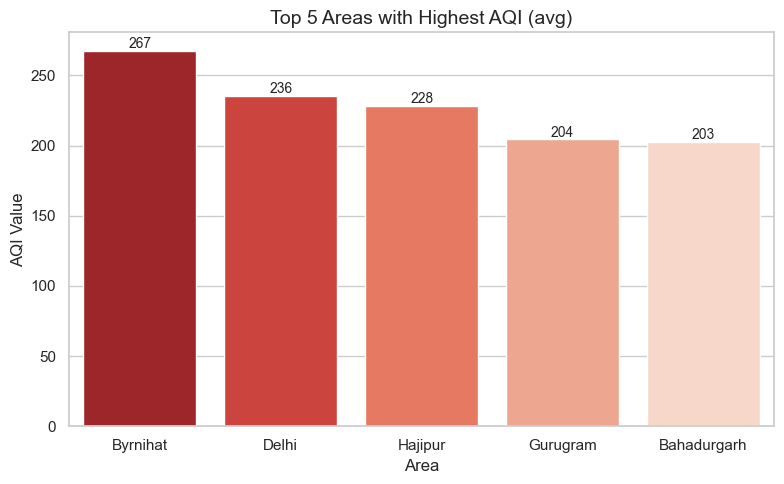

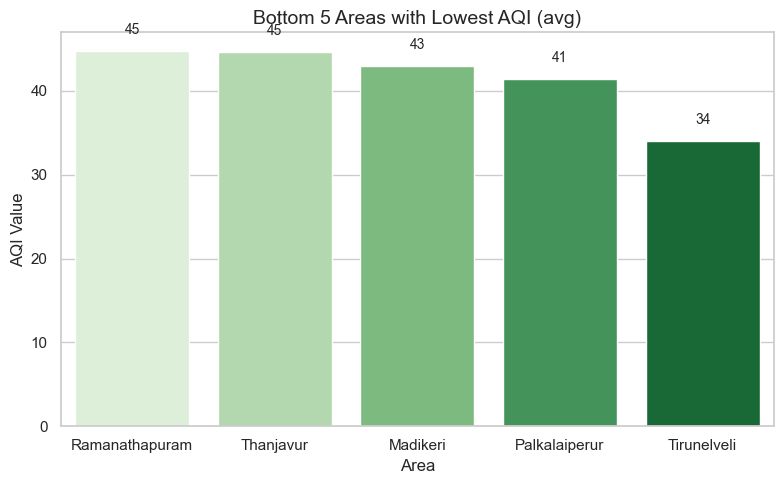

In [51]:
sns.set(style="whitegrid")

# ---------- Top 5 Plot ----------
plt.figure(figsize=(8, 5))
sns.barplot(data=top_5, x='area', y='average_aqi', palette='Reds_r')
plt.title('Top 5 Areas with Highest AQI (avg)', fontsize=14)
plt.xlabel('Area')
plt.ylabel('AQI Value')

# Annotate values on top of bars
for i, val in enumerate(top_5['average_aqi']):
    plt.text(i, val + 2, f'{val:.0f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# ---------- Bottom 5 Plot ----------
plt.figure(figsize=(8, 5))
sns.barplot(data=bottom_5, x='area', y='average_aqi', palette='Greens')
plt.title('Bottom 5 Areas with Lowest AQI (avg)', fontsize=14)
plt.xlabel('Area')
plt.ylabel('AQI Value')

# Annotate values on top of bars
for i, val in enumerate(bottom_5['average_aqi']):
    plt.text(i, val + 2, f'{val:.0f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

2. List out top 2 and bottom 2 prominent pollutants for each state of southern India. 
(Consider data post covid: 2022 onwards)

In [52]:
aqi.state.unique()

array(['Maharashtra', 'Bihar', 'Madhya Pradesh', 'Chhattisgarh', 'Assam',
       'Manipur', 'Kerala', 'West Bengal', 'Odisha', 'Karnataka',
       'Gujarat', 'Uttarakhand', 'Tamil Nadu', 'Andhra Pradesh',
       'Rajasthan', 'Uttar Pradesh', 'Punjab', 'Mizoram', 'Chandigarh',
       'Telangana', 'Puducherry', 'Meghalaya', 'Himachal Pradesh',
       'Jharkhand', 'Haryana', 'Arunachal Pradesh', 'Nagaland', 'Tripura',
       'Delhi', 'Andaman and Nicobar Islands', 'Sikkim',
       'Jammu and Kashmir'], dtype=object)

In [53]:
post_covid = aqi[aqi['date']>='2022-01-01']

south_states = post_covid[post_covid['state'].isin(['Kerala', 'Karnataka', 'Tamil Nadu', 'Andhra Pradesh', 'Telangana', 'Puducherry'])]

grouped_data = south_states.groupby(['state', 'prominent_pollutants']).agg(Counts=('prominent_pollutants', 'count')).reset_index()

top_bottom = grouped_data.groupby('state', group_keys=False).apply(
    lambda x: pd.concat([x.nlargest(2, 'Counts'), x.nsmallest(2, 'Counts')])
)

top_bottom

,state,prominent_pollutants,Counts
7,Andhra Pradesh,PM10,3182
14,Andhra Pradesh,PM2.5,1757
10,Andhra Pradesh,"PM10,NO2,O3",1
11,Andhra Pradesh,"PM10,NO2,PM2.5,O3",1
31,Karnataka,PM10,13404
20,Karnataka,CO,2913
26,Karnataka,"NO2,O3",1
28,Karnataka,"NO2,SO2,CO",1
55,Kerala,PM10,3167
59,Kerala,PM2.5,1123


In [57]:
# Pivoting for stacked bar
pivot_df = top_bottom.pivot_table(index='state', columns='prominent_pollutants', values='Counts', aggfunc='sum', fill_value=0)
pivot_df

prominent_pollutants,CO,"CO,O3",NO2,"NO2,O3","NO2,SO2,CO",O3,PM10,"PM10,NH3,CO","PM10,NO2,O3","PM10,NO2,PM2.5,O3",PM2.5,"PM2.5,PM10",SO2
state,,,,,,,,,,,,,
Andhra Pradesh,0,0,0,0,0,0,3182,0,1,1,1757,0,0
Karnataka,2913,0,0,1,1,0,13404,0,0,0,0,0,0
Kerala,0,6,0,0,0,0,3167,0,0,0,1123,0,7
Puducherry,148,0,0,0,0,303,413,0,0,0,206,0,0
Tamil Nadu,0,0,0,0,0,0,6253,1,0,1,2268,0,0
Telangana,0,1,1,0,0,0,315,0,0,0,0,343,0


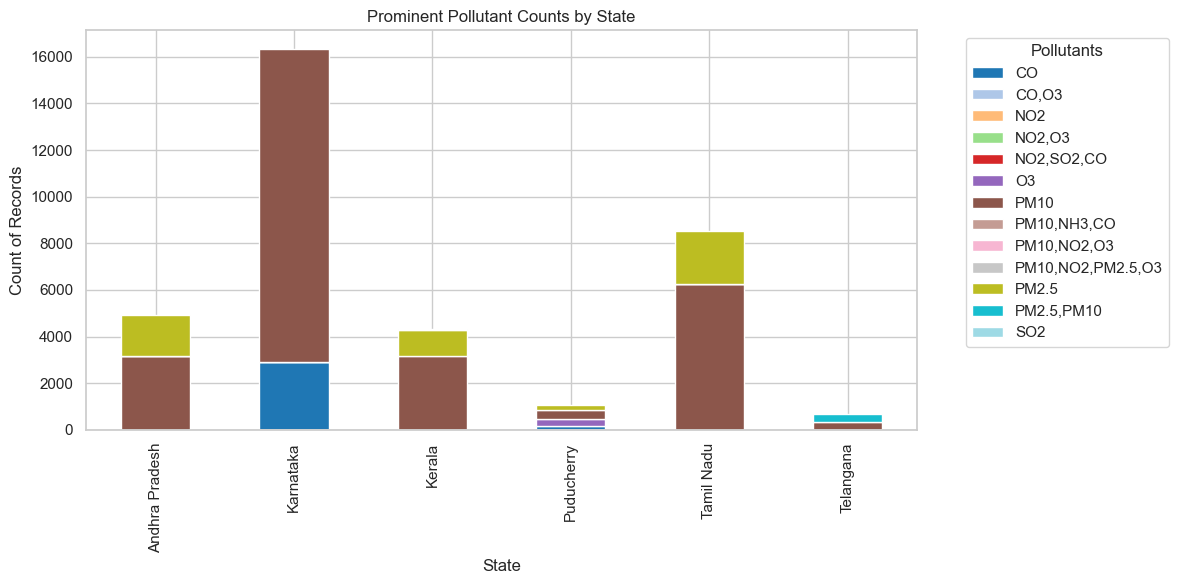

In [58]:
# Plotting
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Prominent Pollutant Counts by State")
plt.xlabel("State")
plt.ylabel("Count of Records")
plt.legend(title="Pollutants", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [59]:
south_states.state.unique()

array(['Kerala', 'Karnataka', 'Tamil Nadu', 'Andhra Pradesh', 'Telangana',
       'Puducherry'], dtype=object)

3. Does AQI improve on weekends vs weekdays in Indian metro cities (Delhi, 
Mumbai, Chennai, Kolkata, Bengaluru, Hyderabad, Ahmedabad, Pune)? 
(Consider data from last 1 year)

In [60]:
# extract the day of week
aqi['day'] = aqi['date'].dt.day_name()
aqi.day.unique()

def is_weekend(day):
    if day in ['Saturday', 'Sunday']:
        return True
    else:
        return False
    
    
aqi['is_weekend'] = aqi['day'].apply(lambda x: is_weekend(x))


In [61]:
# find the max or latest date
aqi['date'].max()

Timestamp('2025-12-04 00:00:00')

In [63]:
# solving the asked ques:
last_year_data = aqi[aqi['date'] >= '2024-12-04']

states_data = last_year_data[last_year_data['area'].isin(['Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Bengaluru', 'Hyderabad', 'Ahmedabad', 'Pune'])]

grouped_data = states_data.groupby(['area', 'is_weekend'])['aqi_value'].mean().reset_index(name='Avg_aqi_val')

grouped_data

,area,is_weekend,Avg_aqi_val
0,Ahmedabad,False,133.158879
1,Ahmedabad,True,129.750000
2,Bengaluru,False,85.364486
3,Bengaluru,True,87.450000
4,Chennai,False,74.205607
5,Chennai,True,72.300000
6,Delhi,False,243.065421
7,Delhi,True,216.100000
8,Hyderabad,False,89.364486
9,Hyderabad,True,90.400000


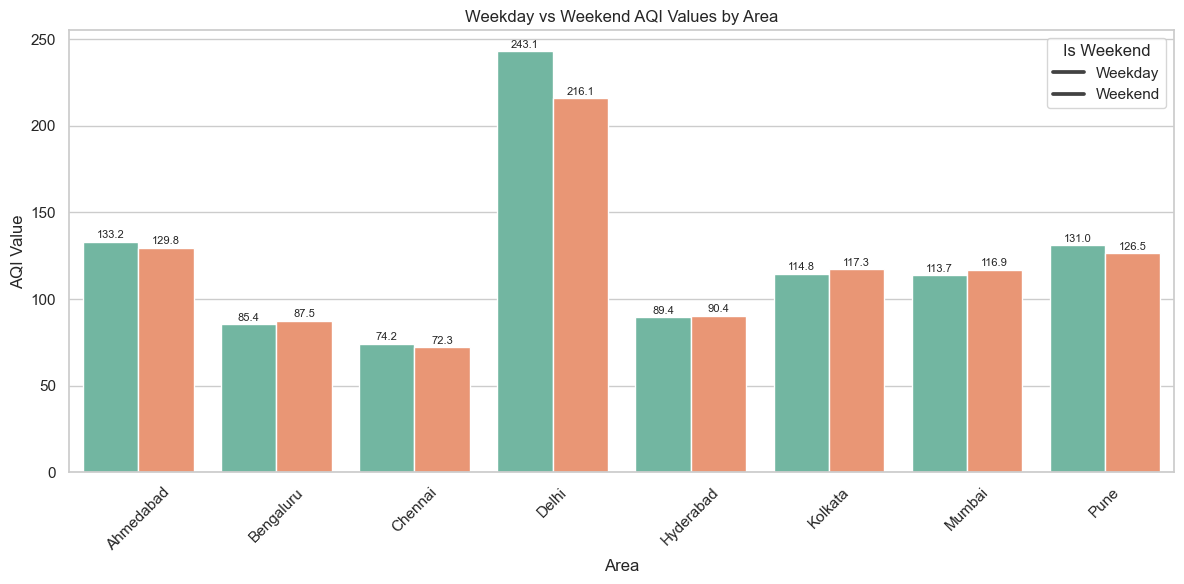

In [67]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='area', y='Avg_aqi_val', hue='is_weekend', palette='Set2')

# Annotate values
for i, row in grouped_data.iterrows():
    x_pos = i // 2 + (0.2 if row['is_weekend'] else -0.2)
    plt.text(x=x_pos, y=row['Avg_aqi_val'] + 2, s=f"{row['Avg_aqi_val']:.1f}", ha='center', fontsize=8)

plt.title("Weekday vs Weekend AQI Values by Area")
plt.xlabel("Area")
plt.ylabel("AQI Value")
plt.xticks(rotation=45)
plt.legend(title="Is Weekend", labels=["Weekday", "Weekend"])
plt.tight_layout()
plt.show()


In [68]:
# value check:
if aqi['area'].str.contains('Mumbai').any():
    print("Mumbai is present")
else:
    print("Mumbai is not present")

Mumbai is present


4. Which months consistently show the worst air quality across Indian states — 
(Consider top 10 states with high distinct areas)

In [69]:
aqi.Month.unique()

array(['April', 'December', 'November', 'October', 'September', 'August',
       'July', 'June', 'May', 'March', 'February', 'January'],
      dtype=object)

In [70]:
top_10_states = aqi.groupby('state')['area'].nunique().nlargest(10).reset_index(name='area_count')

req_data = aqi[aqi['state'].isin(top_10_states['state'])]

grouped_data = req_data.groupby(['state', 'Month'])['aqi_value'].mean().reset_index(name='avg_aqi')

sorted_data = grouped_data.sort_values(by=['state', 'avg_aqi'], ascending=[True, False])

sorted_data

,state,Month,avg_aqi
2,Andhra Pradesh,December,96.341625
4,Andhra Pradesh,January,94.047619
9,Andhra Pradesh,November,93.336700
3,Andhra Pradesh,February,84.770627
10,Andhra Pradesh,October,82.164706
...,...,...,...
115,Uttar Pradesh,March,118.207991
114,Uttar Pradesh,June,109.947216
119,Uttar Pradesh,September,97.409431
109,Uttar Pradesh,August,93.009847


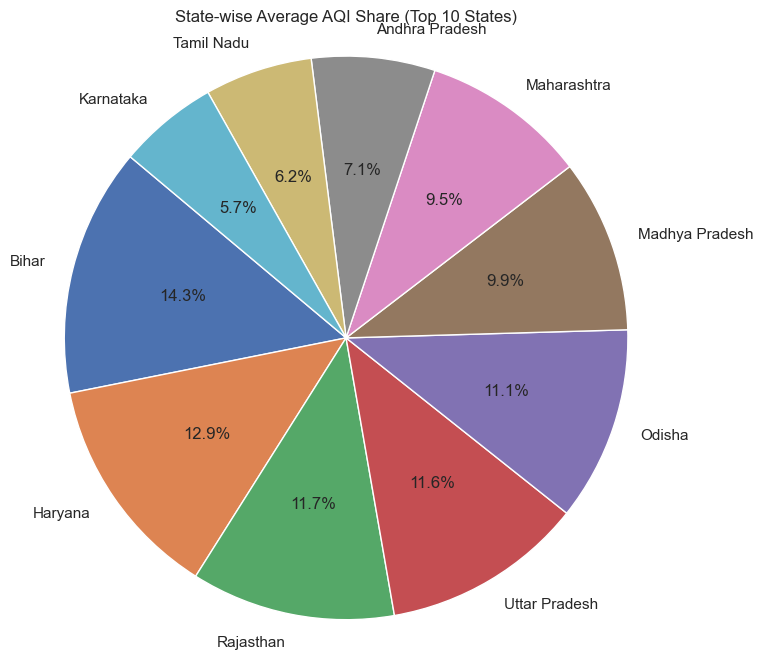

In [73]:
statewise_avg = sorted_data.groupby('state')['avg_aqi'].mean().reset_index()

statewise_avg = statewise_avg.sort_values(by='avg_aqi', ascending=False)

# plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(statewise_avg['avg_aqi'], labels=statewise_avg['state'], autopct='%1.1f%%', startangle=140)
plt.title('State-wise Average AQI Share (Top 10 States)')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular.
plt.show()


5. For the city of Bengaluru, how many days fell under each air quality category 
(e.g., Good, Moderate, Poor, etc.) between March and May 2025? 

In [74]:
filtered_date = aqi[(aqi['date'] >= '2025-03-01') & (aqi['date']<='2025-05-31')]

bengaluru_data = filtered_date[filtered_date['area']=='Bengaluru']

grouped_data = bengaluru_data.groupby('air_quality_status')['date'].nunique()

grouped_data

air_quality_status
Moderate         8
Satisfactory    41
Name: date, dtype: int64

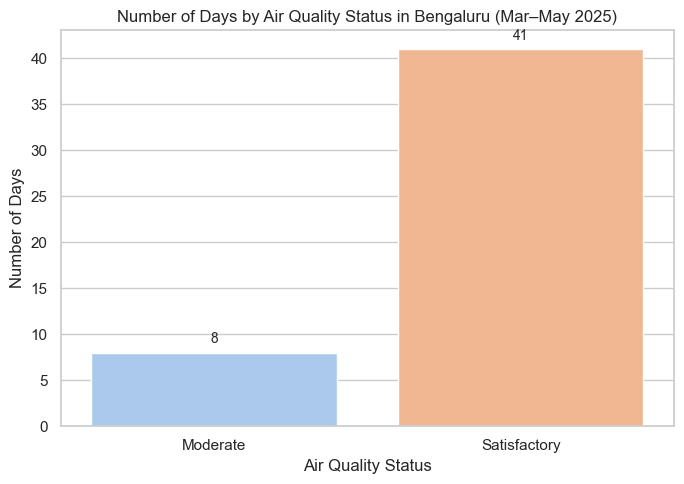

In [75]:
# Convert grouped_data to DataFrame for plotting
grouped_df = grouped_data.reset_index(name='day_count')

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(data=grouped_df, x='air_quality_status', y='day_count', palette='pastel')

# Annotate bars with values
for i, row in grouped_df.iterrows():
    plt.text(i, row['day_count'] + 1, f"{row['day_count']}", ha='center', fontsize=10)

# Title and labels
plt.title('Number of Days by Air Quality Status in Bengaluru (Mar–May 2025)')
plt.xlabel('Air Quality Status')
plt.ylabel('Number of Days')
plt.tight_layout()
plt.show()

6. List the top two most reported disease illnesses in each state over the past three 
years, along with the corresponding average Air Quality Index (AQI) for that 
period.

In [76]:
disease.reporting_date.max()

Timestamp('2025-12-04 00:00:00')

In [77]:
last_3_year = disease[disease['reporting_date']>='2022-12-05']

grouped_data = last_3_year.groupby(['state', 'disease_illness_name'])['cases'].sum().reset_index(name='Total Cases')

# here, x shows a state, then nlargest picks records from that state group with the top-2 values of cases:
top_2_diseases = grouped_data.groupby('state', group_keys=False).apply(
    lambda x: x.nlargest(2, 'Total Cases')
)

top_2_diseases

,state,disease_illness_name,Total Cases
0,Andaman and Nicobar Islands,Acute Diarrheal Disease,94
1,Andaman and Nicobar Islands,Fever with Rash,8
2,Andhra Pradesh,Acute Diarrheal Disease,2180
6,Andhra Pradesh,Food Poisoning,575
11,Arunachal Pradesh,Acute Diarrheal Disease,175
...,...,...,...
449,Uttar Pradesh,Food Poisoning,1631
464,Uttarakhand,Food Poisoning,472
459,Uttarakhand,Acute Diarrheal Disease,467
468,West Bengal,Acute Diarrheal Disease,3218


In [78]:
last_3_year_aqi = aqi[aqi['date']>='2022-12-05']

grouped_st_data_aqi = last_3_year_aqi.groupby('state')['aqi_value'].mean().reset_index(name='avg_aqi')

grouped_st_data_aqi

,state,avg_aqi
0,Andaman and Nicobar Islands,57.706897
1,Andhra Pradesh,78.901710
2,Arunachal Pradesh,55.961207
3,Assam,117.664924
4,Bihar,157.980130
5,Chandigarh,146.633979
6,Chhattisgarh,79.551750
7,Delhi,210.692132
8,Gujarat,110.528490
9,Haryana,138.102921


In [80]:
final_data = top_2_diseases.merge(grouped_st_data_aqi, on='state', how='left')
final_data

,state,disease_illness_name,Total Cases,avg_aqi
0,Andaman and Nicobar Islands,Acute Diarrheal Disease,94,57.706897
1,Andaman and Nicobar Islands,Fever with Rash,8,57.706897
2,Andhra Pradesh,Acute Diarrheal Disease,2180,78.901710
3,Andhra Pradesh,Food Poisoning,575,78.901710
4,Arunachal Pradesh,Acute Diarrheal Disease,175,55.961207
...,...,...,...,...
66,Uttar Pradesh,Food Poisoning,1631,124.758667
67,Uttarakhand,Food Poisoning,472,88.437614
68,Uttarakhand,Acute Diarrheal Disease,467,88.437614
69,West Bengal,Acute Diarrheal Disease,3218,119.871349


7. List the top 5 states with high EV adoption and analyse if their average AQI is 
significantly better compared to states with lower EV adoption

In [81]:
vehicle.fuel.unique()

array(['DIESEL', 'PETROL', 'ELECTRIC(BOV)', 'PETROL/ETHANOL', 'PURE EV',
       'PETROL/HYBRID', 'STRONG HYBRID EV', 'CNG ONLY', 'PETROL/CNG',
       'ETHANOL', 'DIESEL/HYBRID', 'NOT APPLICABLE', 'LPG ONLY',
       'PLUG-IN HYBRID EV', 'LNG', 'DUAL DIESEL/LNG', 'PETROL/LPG',
       'FUEL CELL HYDROGEN', 'SOLAR', 'DUAL DIESEL/CNG'], dtype=object)

In [82]:
ev_data = vehicle[vehicle['fuel'].isin(['ELECTRIC(BOV)', 'PURE EV', 'STRONG HYBRID EV', 'PLUG-IN HYBRID EV', 'FUEL CELL HYDROGEN', 'SOLAR']
)]

grouped_st_ev_data = ev_data.groupby('state')['value'].sum().reset_index(name='Total_Adoption').sort_values(by='Total_Adoption', ascending=False)

grouped_st_ev_data

,state,Total_Adoption
32,Uttar Pradesh,921471
20,Maharashtra,650823
15,Karnataka,480191
30,Tamil Nadu,329634
28,Rajasthan,305605
4,Bihar,280947
10,Gujarat,251194
8,Delhi,245938
19,Madhya Pradesh,238701
16,Kerala,226600


In [83]:
final_ev_data = grouped_st_ev_data.merge(grouped_st_data_aqi, how='left')
final_ev_data

,state,Total_Adoption,avg_aqi
0,Uttar Pradesh,921471,124.758667
1,Maharashtra,650823,103.826340
2,Karnataka,480191,63.567459
3,Tamil Nadu,329634,68.325352
4,Rajasthan,305605,128.288749
5,Bihar,280947,157.980130
6,Gujarat,251194,110.528490
7,Delhi,245938,210.692132
8,Madhya Pradesh,238701,109.392792
9,Kerala,226600,69.730583


Top 5 EV adoption states don’t always have better air quality.

Some (like Karnataka, Tamil Nadu) have low AQI, but others (like UP, Rajasthan) have high AQI.

So, EV adoption alone doesn't guarantee cleaner air.


# Secondary Research Questions:

1. Who are the major competitors in the Indian air purifier market, a

In [142]:
comp_data = [
    ["Dyson", "₹30,000 – ₹60,000+", "HEPA+Carbon filter, bladeless fans, 360° air intake, real-time AQI, app", "★★★★★ (Premium)", "★★★★★ (High)", "Exclusive showrooms, doorstep", "Personalized support, scheduled service", "High-income households, luxury segment"],
    ["Philips", "₹10,000 – ₹35,000", "VitaShield, HEPA, smart sensors, allergen mode", "★★★★☆ (Reliable)", "★★★★★ (High)", "Pan-India presence", "Toll-free support, AMC options", "Urban families, health-conscious users"],
    ["Daikin", "₹20,000 – ₹45,000", "AC-integrated, electrostatic filters, odor removal", "★★★★☆ (Strong)", "★★★★☆ (Strong)", "Through AC dealership network", "Standard service contract", "Offices, premium residential customers"],
    ["Panasonic", "₹8,000 – ₹25,000", "Nanoe™ tech, energy-saving, HEPA, app features", "★★★★☆ (Good)", "★★★★☆ (Reliable)", "Good regional coverage", "On-site service, app integration", "Mid-income smart home users"],
    ["Xiaomi", "₹7,000 – ₹15,000", "Smart control, OLED display, HEPA filters, real-time AQI display", "★★★★☆ (Good)", "★★★☆☆ (Moderate)", "Limited centers, app-based", "Self-troubleshooting, app support", "Budget tech-savvy youth, metro cities"],
    ["Eureka Forbes", "₹6,000 – ₹30,000", "HEPA+UV, air-ionizer, Indian conditions focused", "★★★★☆ (Balanced)", "★★★★☆ (Trusted)", "Widespread service network", "AMC plans, offline demo", "Tier 2 & Tier 3 households"],
    ["LG", "₹20,000 – ₹50,000", "PM1 sensor, 360° purifier, Wi-Fi app, display panel", "★★★★★ (Excellent)", "★★★★★ (High)", "Reliable, with doorstep service", "App, voice assistant integration", "Tech-savvy premium users, smart homes"],
    ["Haier", "₹9,000 – ₹20,000", "Compact design, multiple filters, decent performance", "★★★☆☆ (Average)", "★★★☆☆ (Developing)", "Moderate service availability", "Basic service model", "Value buyers, small offices/homes"],
    ["Blueair", "₹25,000 – ₹70,000", "HEPASilent™, real-time monitoring, ultra-quiet", "★★★★★ (Premium)", "★★★★☆ (Global)", "Limited but responsive", "Premium segment support, online help", "Premium homes/offices needing silence"],
    ["KENT RO", "₹8,000 – ₹20,000", "HEPA+Ionizer, ozone-based models, dual purifier-water", "★★★☆☆ (Mixed)", "★★★★☆ (Indian brand)", "Tier 1–3 city support", "AMC, bundled with RO service", "Health-aware Indian middle-class users"]
]

columns = ["Brand", "Price Range", "Features", "Quality Level", "Brand Trust", "After-Sales Support", "Services Offered", "Target Audience"]

df_air_purifiers = pd.DataFrame(comp_data, columns=columns)
df_air_purifiers


,Brand,Price Range,Features,Quality Level,Brand Trust,After-Sales Support,Services Offered,Target Audience
0,Dyson,"₹30,000 – ₹60,000+","HEPA+Carbon filter, bladeless fans, 360° air i...",★★★★★ (Premium),★★★★★ (High),"Exclusive showrooms, doorstep","Personalized support, scheduled service","High-income households, luxury segment"
1,Philips,"₹10,000 – ₹35,000","VitaShield, HEPA, smart sensors, allergen mode",★★★★☆ (Reliable),★★★★★ (High),Pan-India presence,"Toll-free support, AMC options","Urban families, health-conscious users"
2,Daikin,"₹20,000 – ₹45,000","AC-integrated, electrostatic filters, odor rem...",★★★★☆ (Strong),★★★★☆ (Strong),Through AC dealership network,Standard service contract,"Offices, premium residential customers"
3,Panasonic,"₹8,000 – ₹25,000","Nanoe™ tech, energy-saving, HEPA, app features",★★★★☆ (Good),★★★★☆ (Reliable),Good regional coverage,"On-site service, app integration",Mid-income smart home users
4,Xiaomi,"₹7,000 – ₹15,000","Smart control, OLED display, HEPA filters, rea...",★★★★☆ (Good),★★★☆☆ (Moderate),"Limited centers, app-based","Self-troubleshooting, app support","Budget tech-savvy youth, metro cities"
5,Eureka Forbes,"₹6,000 – ₹30,000","HEPA+UV, air-ionizer, Indian conditions focused",★★★★☆ (Balanced),★★★★☆ (Trusted),Widespread service network,"AMC plans, offline demo",Tier 2 & Tier 3 households
6,LG,"₹20,000 – ₹50,000","PM1 sensor, 360° purifier, Wi-Fi app, display ...",★★★★★ (Excellent),★★★★★ (High),"Reliable, with doorstep service","App, voice assistant integration","Tech-savvy premium users, smart homes"
7,Haier,"₹9,000 – ₹20,000","Compact design, multiple filters, decent perfo...",★★★☆☆ (Average),★★★☆☆ (Developing),Moderate service availability,Basic service model,"Value buyers, small offices/homes"
8,Blueair,"₹25,000 – ₹70,000","HEPASilent™, real-time monitoring, ultra-quiet",★★★★★ (Premium),★★★★☆ (Global),Limited but responsive,"Premium segment support, online help",Premium homes/offices needing silence
9,KENT RO,"₹8,000 – ₹20,000","HEPA+Ionizer, ozone-based models, dual purifie...",★★★☆☆ (Mixed),★★★★☆ (Indian brand),Tier 1–3 city support,"AMC, bundled with RO service",Health-aware Indian middle-class users


2. How aware are Indian citizens of what AQI (Air Quality Index) means — and do they 
understand its health implications?

In [143]:
aware_data = {
    "Metric": [
        "% of urban respondents who have heard of AQI",
        "% who can interpret AQI levels (e.g., '200 means unhealthy')",
        "% who take preventive action (e.g., wearing mask on high AQI days)",
        "Rural awareness of AQI concept",
        "Major barrier"
    ],
    "Result": [
        "~60–70%",
        "~25–35%",
        "~20–30%",
        "< 10%",
        "Lack of formal education or access to real-time data"
    ]
}

aqi_awareness_df = pd.DataFrame(aware_data)
print(aqi_awareness_df)


                                              Metric  \
0       % of urban respondents who have heard of AQI   
1  % who can interpret AQI levels (e.g., '200 mea...   
2  % who take preventive action (e.g., wearing ma...   
3                     Rural awareness of AQI concept   
4                                      Major barrier   

                                              Result  
0                                            ~60–70%  
1                                            ~25–35%  
2                                            ~20–30%  
3                                              < 10%  
4  Lack of formal education or access to real-tim...  


Most awareness is urban-centric, especially among tech users (via apps like SAFAR, AQI.in, etc.).

Awareness is higher in cities like Delhi, Mumbai, Bengaluru, due to frequent headlines and smog crises.

Health implications are poorly understood — people often associate bad air with “cough” but not long-term risks like COPD or reduced lung function in children.

Preventive behavior is still low: people rarely avoid going out or using purifiers unless AQI > 400.

3. Which pollution control policies introduced by the Indian government in the past 5 years 
have had the most measurable impact on improving air quality — and how have these 
impacts varied across regions or cities?

In [145]:

schemes_data = {
    "Policy / Initiative": [
        "National Clean Air Programme (NCAP)",
        "Graded Response Action Plan (GRAP)",
        "BS-VI Vehicle Emission Norms",
        "FAME-II (EV Promotion Scheme)",
        "Closure of Coal-based Plants in Urban Limits",
        "PUSA Bio-Decomposer (for stubble burning)",
        "State-level EV Policies (e.g., Delhi EV Policy)"
    ],
    "Description": [
        "Aimed to reduce PM2.5 and PM10 by 20–30% by 2024 (baseline 2017)",
        "Emergency AQI response plan in Delhi-NCR (construction ban, genset ban, etc.)",
        "Nationwide BS-VI adoption in 2020 to reduce vehicle emissions",
        "Encouraged electric vehicle adoption via subsidies and public transport focus",
        "Older coal plants closed or relocated to reduce city emissions",
        "Bio-solution used in stubble-burning regions to reduce fire-based emissions",
        "Local EV incentives, charging infra, fleet conversions at state level"
    ],
    "Measured Impact": [
        "15–25% PM reduction in multiple cities",
        "Lower AQI spikes during Oct–Jan after GRAP activation",
        "80% reduction in fuel sulphur, lower emissions in metros",
        "1.5+ lakh EVs supported; increase in EV adoption",
        "Reduced SO2 and PM10 near cities",
        "Reduction in PM2.5 levels in 2023 over previous years",
        "Delhi EV share >10%; visible air quality improvement zones"
    ],
    "Cities / Regions Most Affected": [
        "132 non-attainment cities: Delhi NCR, UP, Maharashtra",
        "Delhi-NCR",
        "Metro cities: Delhi, Mumbai, Bengaluru, Chennai",
        "Delhi, Bengaluru, Pune, Hyderabad",
        "Delhi NCR, Maharashtra, West Bengal",
        "Punjab, Haryana, Delhi NCR",
        "Delhi, Maharashtra, Tamil Nadu"
    ]
}

df_policies = pd.DataFrame(schemes_data)
df_policies


,Policy / Initiative,Description,Measured Impact,Cities / Regions Most Affected
0,National Clean Air Programme (NCAP),Aimed to reduce PM2.5 and PM10 by 20–30% by 20...,15–25% PM reduction in multiple cities,"132 non-attainment cities: Delhi NCR, UP, Maha..."
1,Graded Response Action Plan (GRAP),Emergency AQI response plan in Delhi-NCR (cons...,Lower AQI spikes during Oct–Jan after GRAP act...,Delhi-NCR
2,BS-VI Vehicle Emission Norms,Nationwide BS-VI adoption in 2020 to reduce ve...,"80% reduction in fuel sulphur, lower emissions...","Metro cities: Delhi, Mumbai, Bengaluru, Chennai"
3,FAME-II (EV Promotion Scheme),Encouraged electric vehicle adoption via subsi...,1.5+ lakh EVs supported; increase in EV adoption,"Delhi, Bengaluru, Pune, Hyderabad"
4,Closure of Coal-based Plants in Urban Limits,Older coal plants closed or relocated to reduc...,Reduced SO2 and PM10 near cities,"Delhi NCR, Maharashtra, West Bengal"
5,PUSA Bio-Decomposer (for stubble burning),Bio-solution used in stubble-burning regions t...,Reduction in PM2.5 levels in 2023 over previou...,"Punjab, Haryana, Delhi NCR"
6,"State-level EV Policies (e.g., Delhi EV Policy)","Local EV incentives, charging infra, fleet con...",Delhi EV share >10%; visible air quality impro...,"Delhi, Maharashtra, Tamil Nadu"
